In [14]:
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.problem_transform import BinaryRelevance


In [15]:
from pandas import read_csv
import numpy as np
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer

filename = "Downloads/GSR_5Labels_with_RESP.csv"
names = ['HR','NNRR','AVNN','RMSSD','pNN50','TP','VLF','LF','HF','LF_HF','RESP','GSR']
dataframe = read_csv(filename, names = names)
df = dataframe
df.head(5)
df.drop(['NNRR', 'AVNN', 'TP', 'LF','HF','LF_HF'], axis=1, inplace=True)
df.head(5)
array = df.values
X = np.array(df.iloc[:,0:5])
y = np.array(df.iloc[:,5])
y = y.reshape(-1,1)
scaler = MinMaxScaler(feature_range = (0,1)) # scale values to min 0, max 1
rescaledX = scaler.fit_transform(X) # fit trainning feature X into scaler
# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer()
rescaled_y = mlb.fit_transform(y)

set_printoptions(precision = 3)
print(y[0:5,:])

X_train, X_test, y_train, y_test = train_test_split(rescaledX, rescaled_y, test_size = 0.20, random_state = 7)
model = KNeighborsClassifier(n_neighbors=3)
# model = BinaryRelevance(KNeighborsClassifier(n_neighbors=3))

model.fit(X_train,y_train)
model.score(X_test,y_test)

[[3]
 [3]
 [1]
 [3]
 [1]]


0.7129629629629629

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [17]:
# variance caused by each principal components
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.473, 0.308])

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))


[[13  3  0  0  0]
 [ 6 22  0  0  0]
 [ 1  3 16  0  0]
 [ 0  0  2 19  2]
 [ 0  0  0  3 18]]
Accuracy: 0.8148148148148148


In [21]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8148148148148148

In [22]:
from sklearn.utils.multiclass import unique_labels

Confusion matrix, without normalization
[[13  3  0  0  0]
 [ 6 22  0  0  0]
 [ 1  3 16  0  0]
 [ 0  0  2 19  2]
 [ 0  0  0  3 18]]
Normalized confusion matrix
[[0.81 0.19 0.   0.   0.  ]
 [0.21 0.79 0.   0.   0.  ]
 [0.05 0.15 0.8  0.   0.  ]
 [0.   0.   0.09 0.83 0.09]
 [0.   0.   0.   0.14 0.86]]


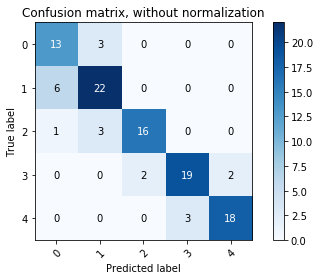

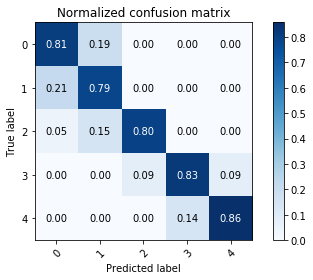

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()